#  Credit Card Default Prediction Project Report

* VIKAS BHAGURE

## About the Dataset

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders


1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

### Step1:Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('CreditCard.csv')
dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [3]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [4]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
23295,23296,160000.0,2,1,2,25,-1,0,-1,-1,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15148,15149,250000.0,1,1,1,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18666,18667,50000.0,2,1,2,23,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3415,3416,200000.0,2,2,1,37,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18714,18715,420000.0,2,1,2,28,0,0,-1,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2000 non-null   int64  
 1   LIMIT_BAL                   2000 non-null   float64
 2   SEX                         2000 non-null   int64  
 3   EDUCATION                   2000 non-null   int64  
 4   MARRIAGE                    2000 non-null   int64  
 5   AGE                         2000 non-null   int64  
 6   PAY_0                       2000 non-null   int64  
 7   PAY_2                       2000 non-null   int64  
 8   PAY_3                       2000 non-null   int64  
 9   PAY_4                       2000 non-null   int64  
 10  PAY_5                       2000 non-null   int64  
 11  PAY_6                       2000 non-null   int64  
 12  BILL_AMT1                   2000 non-null   float64
 13  BILL_AMT2                   

In [6]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,14950.749000,171825.000000,1.603000,1.853000,1.555000,35.458000,-0.024500,-0.138500,-0.179500,-0.213000,...,44390.095500,41502.586000,39643.917000,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500,0.219500
std,8624.251173,131598.930521,0.489398,0.798567,0.516825,9.144892,1.103861,1.163613,1.177698,1.166753,...,65827.281839,61928.132672,60472.016246,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739,0.414011
min,3.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7404.000000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2939.500000,2158.750000,1319.250000,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000,0.000000
50%,14889.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19454.000000,18652.000000,17621.500000,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000,0.000000
75%,22510.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,53394.250000,51005.500000,49484.750000,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,71.000000,6.000000,5.000000,8.000000,7.000000,...,487066.000000,489200.000000,513798.000000,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000,1.000000


**There are 2000 distinct credit card clients.**

**The average value for the amount of credit card limit is 171,825. The standard deviation is unusually large, max value being 730,000.**

**Education Level is mostly graduate school and university.**

**Most of the clients are either married or single .**

**Average age is 35.5 years, with a standard deviation of 9.2**

**As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).**

In [7]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
dataset.index = dataset['ID']

In [9]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0


In [10]:
dataset.drop('ID',axis=1,inplace=True)

In [11]:
dataset.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0


In [12]:
dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [13]:
dataset.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [14]:
dataset['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

In [20]:
dataset['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

In [16]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [17]:
dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')


### Step2: Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

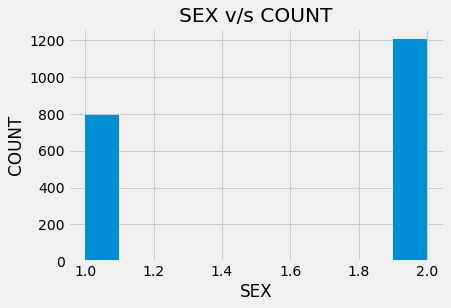

In [18]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

**Number of Male credit holder is less than Female**

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

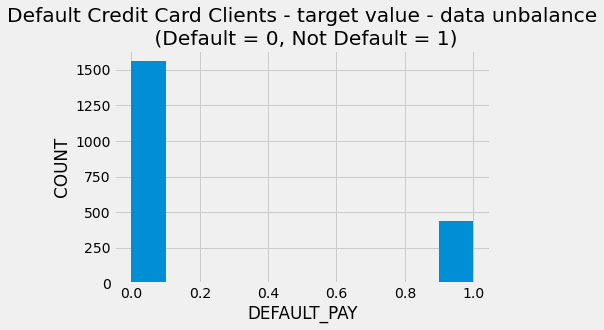

In [19]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

**Percentage of Defaulters are smaller than the Non Defaulters in the given dataset**

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

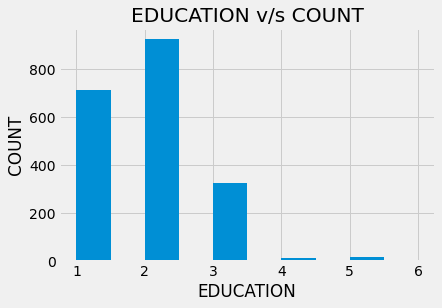

In [21]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

**More number of credit holders are university students followed by Graduates and then High school students**

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

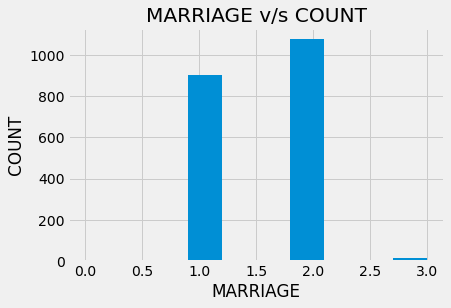

In [22]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

**More number of credit cards holder are Married**

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

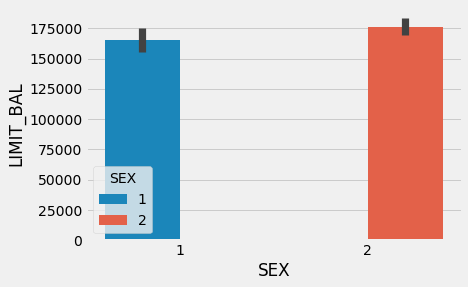

In [23]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')


<AxesSubplot:xlabel='SEX', ylabel='count'>

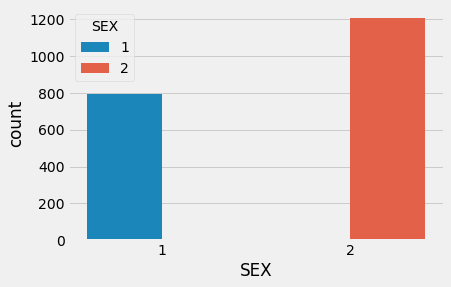

In [24]:
sns.countplot(x='SEX',data=dataset,hue = 'SEX')

<AxesSubplot:xlabel='SEX', ylabel='count'>

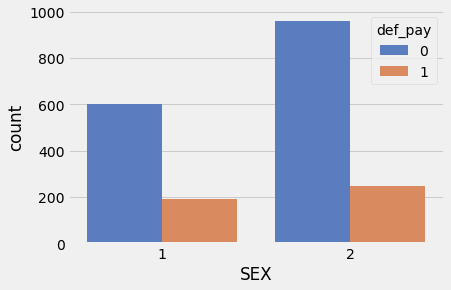

In [25]:
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")  

**It is evident from the above output that females have overall less default payments wrt males**

**Non-Defaults have a higher proportion of Females (Sex=2)**

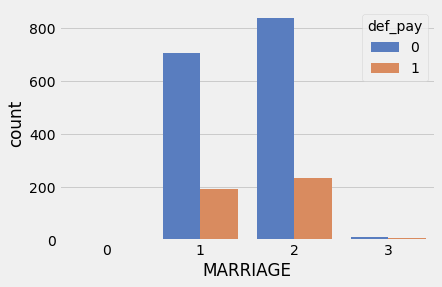

In [26]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")


**From the above plot it is clear that those people who have marital status single have less default payment wrt married status people**

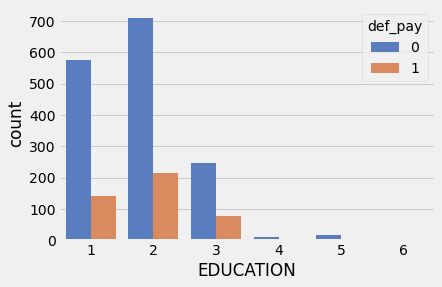

In [27]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")

**From the above plot it is clear that those people who are university students  have less default payment wrt graduates and high school people**

In [28]:

def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

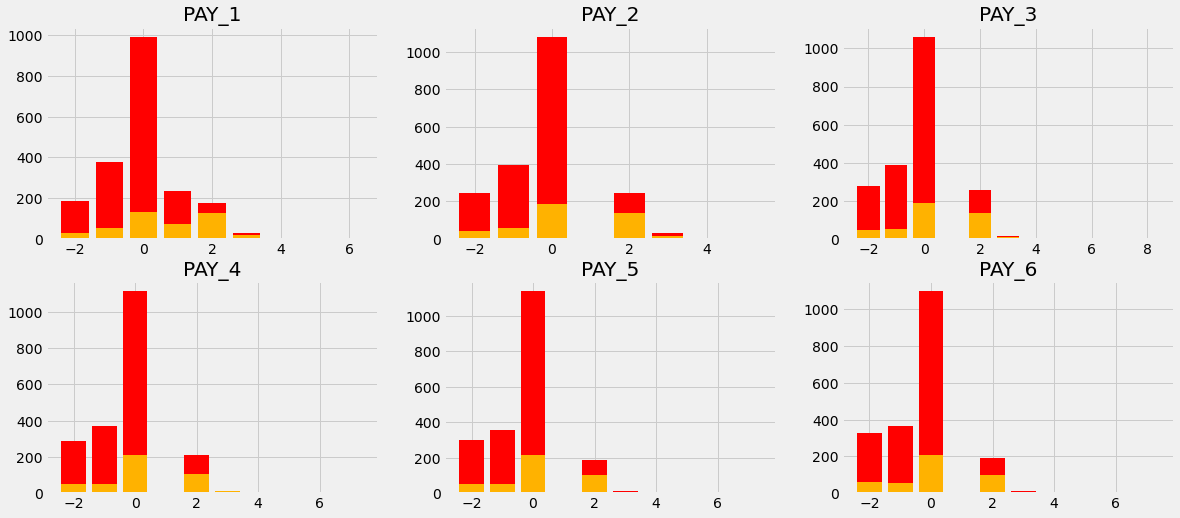

In [29]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

**The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.**

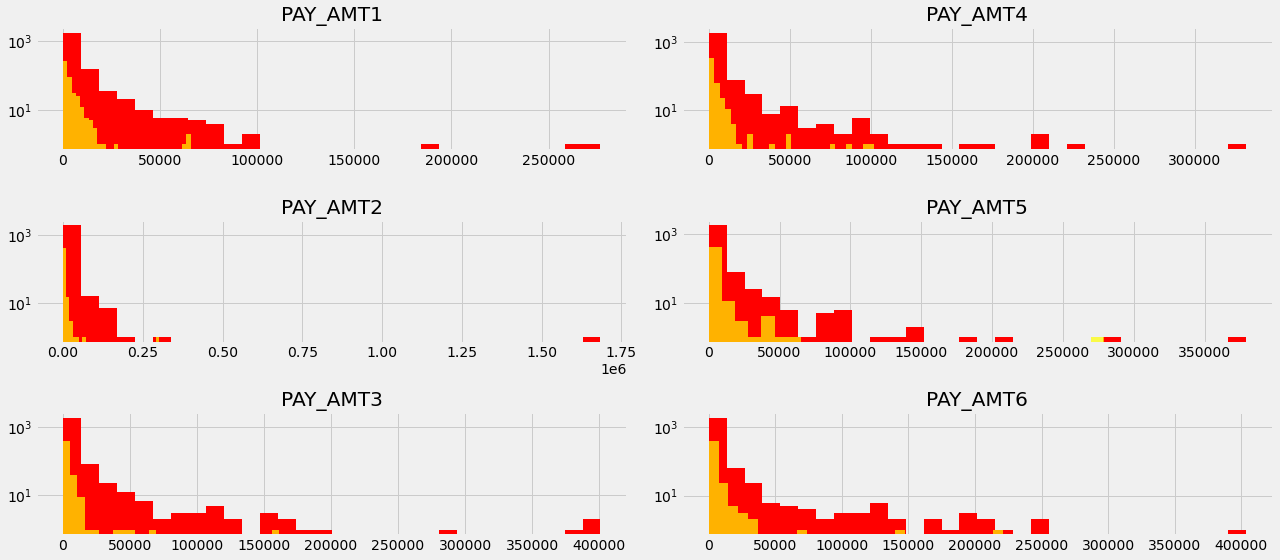

In [30]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(dataset[pay_amt_columns[i]][(dataset['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


**The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters**

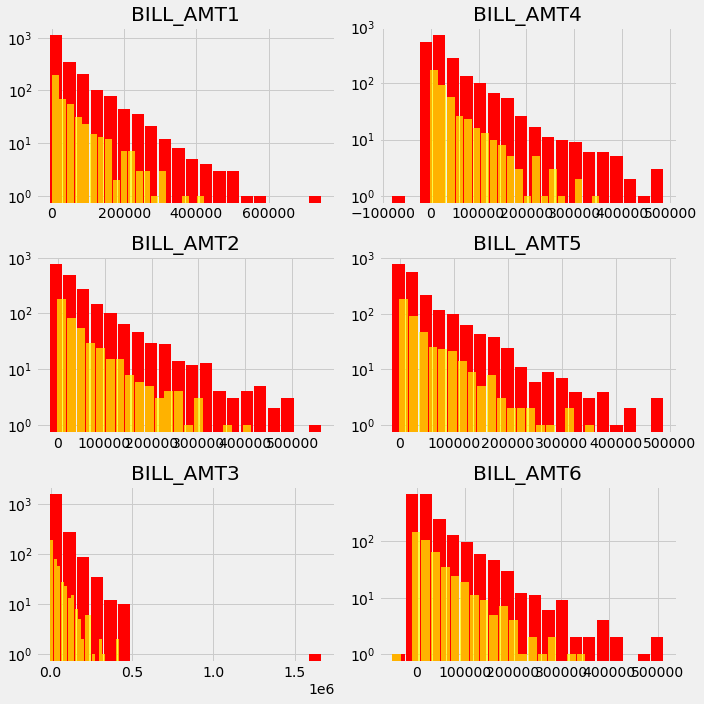

In [31]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of Bill amount generated  for each month explicitly for defaulters and non-defaulters**

<AxesSubplot:xlabel='def_pay', ylabel='AGE'>

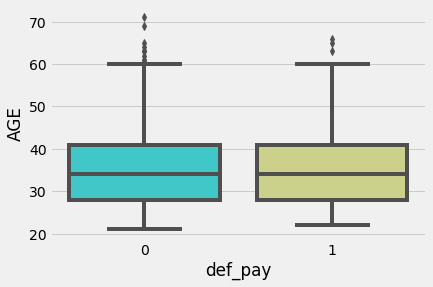

In [32]:
sns.boxplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')


<AxesSubplot:xlabel='def_pay', ylabel='AGE'>

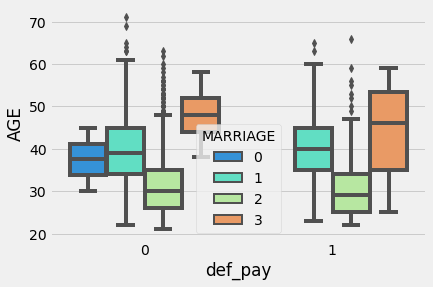

In [33]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='def_pay', ylabel='AGE'>

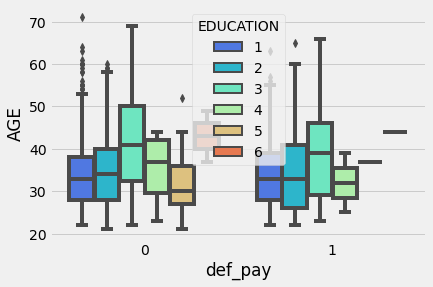

In [34]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )


<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

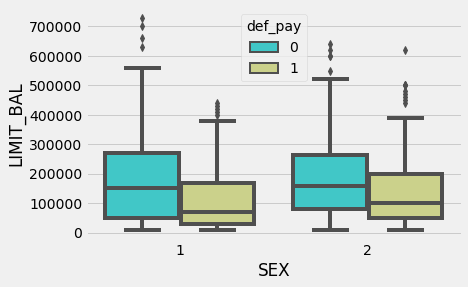

In [35]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

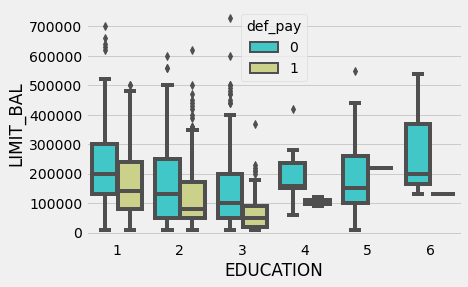

In [36]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

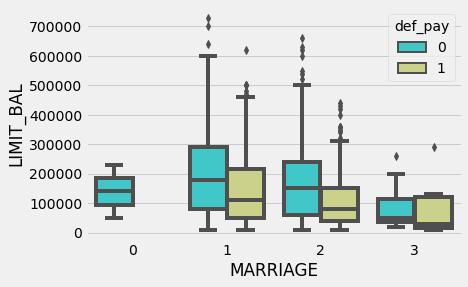

In [37]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

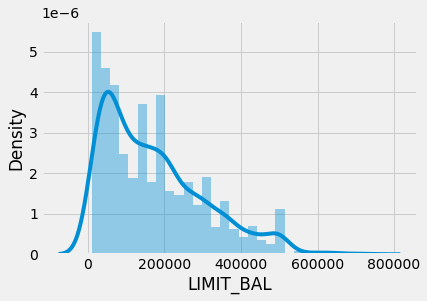

In [38]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

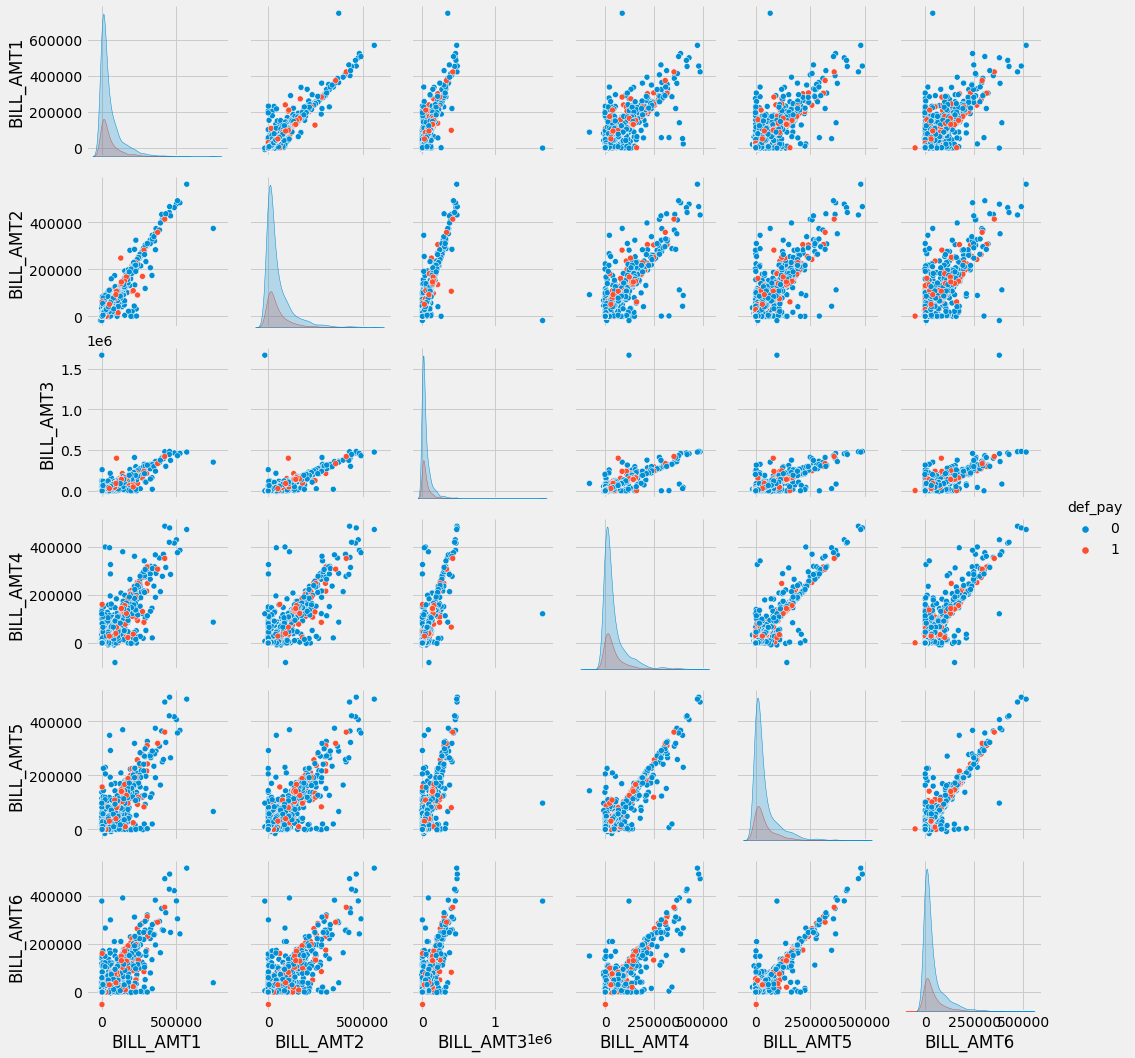

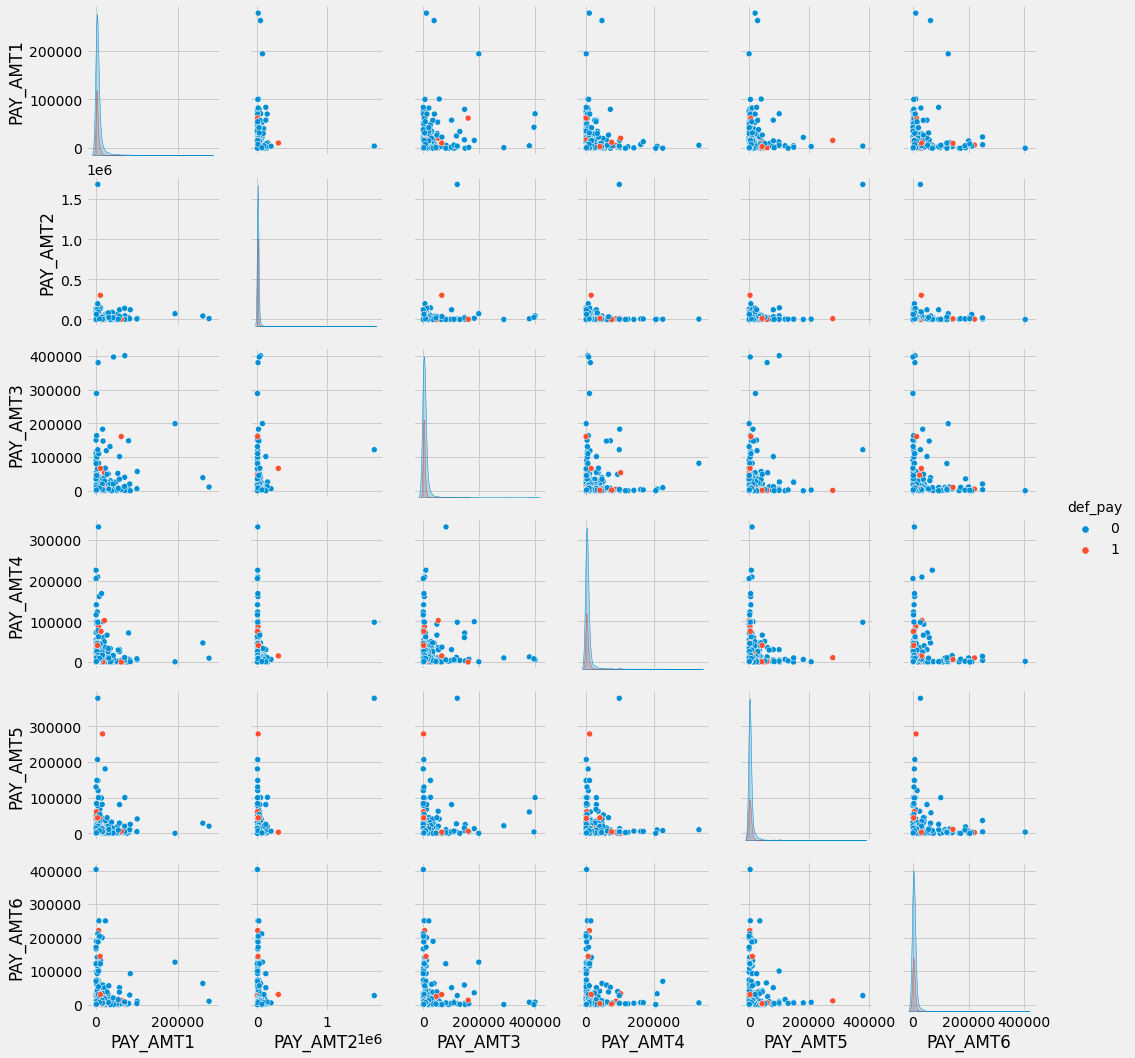

In [40]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')

### Step3: Observing  Correlation between features of the Dataset

In [41]:
correlation = dataset.corr()

<AxesSubplot:>

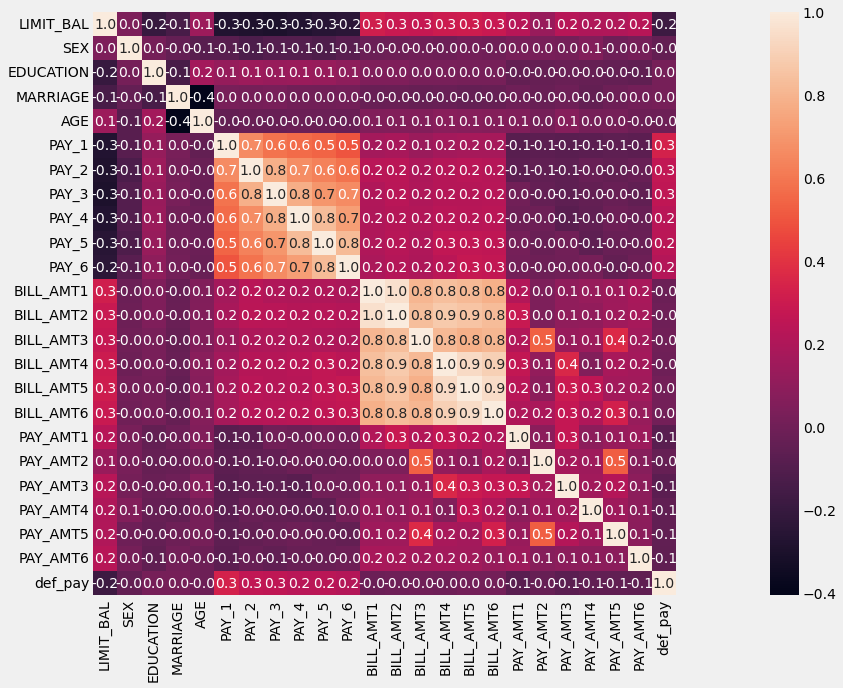

In [42]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

**So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.**

<AxesSubplot:title={'center':'Correlation with Default'}>

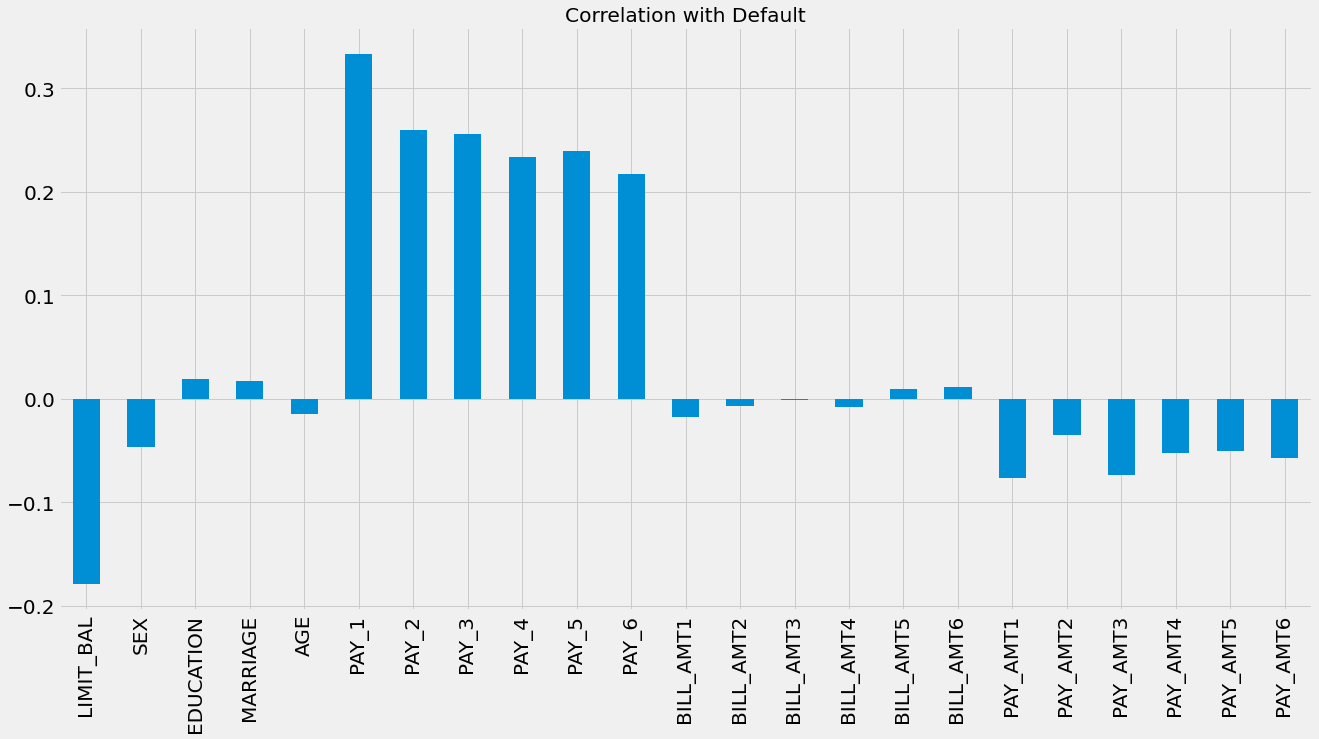

In [43]:

X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

**It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.**



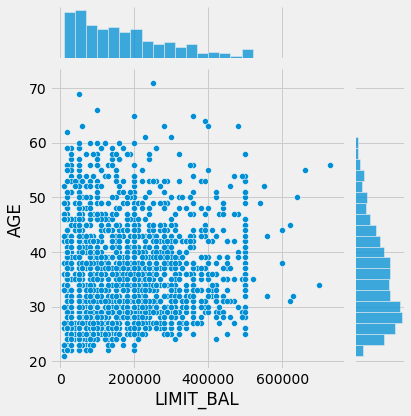

In [44]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")


# Facet Grid

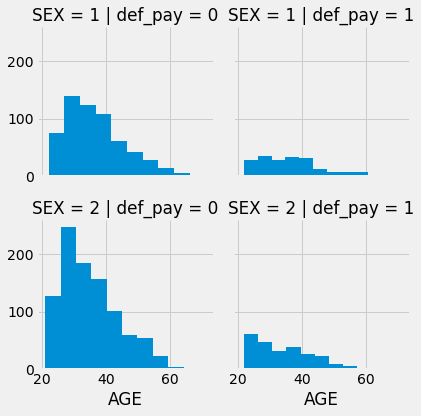

In [45]:
g = sns.FacetGrid(dataset, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')


**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years**

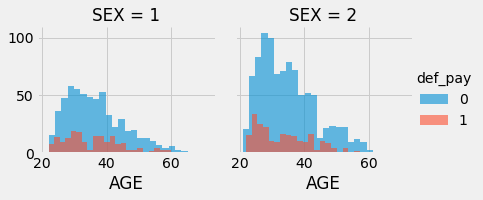

In [46]:
g = sns.FacetGrid(dataset, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years**

In [ ]:
g = sns.FacetGrid(dataset, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

### Step4: Data Cleaning

**EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.**

**MARRIAGE has a label 0 that is undocumented**

**Data Transformation**

**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**

**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**

**Thus is a good occasion to learn how to use the .loc function**

In [47]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [48]:
dataset['EDUCATION'].value_counts(dropna = False)

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [49]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    1076
1     904
3      20
Name: MARRIAGE, dtype: int64

In [50]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [51]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000.0,2,1,2,25,-1,0,-1,-1,0,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15149,250000.0,1,1,1,53,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18667,50000.0,2,1,2,23,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3416,200000.0,2,2,1,37,0,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18715,420000.0,2,1,2,28,0,0,-1,0,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


In [52]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()


0    1788
2     190
3      10
4       5
7       3
5       2
6       2
Name: PAY_6, dtype: int64

In [ ]:
dataset.head()

In [53]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000.0,2,1,2,25,0,0,0,0,0,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15149,250000.0,1,1,1,53,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18667,50000.0,2,1,2,23,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3416,200000.0,2,2,1,37,0,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18715,420000.0,2,1,2,28,0,0,0,0,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


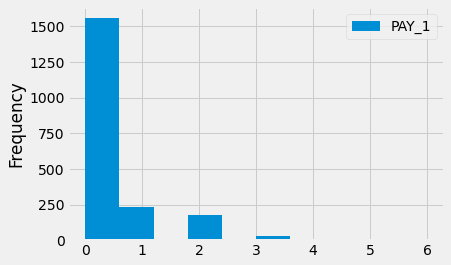

In [54]:

dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [55]:
dataset['PAY_1'].describe()

count    2000.000000
mean        0.349000
std         0.734485
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: PAY_1, dtype: float64

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10748 to 18715
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  2000 non-null   float64
 1   SEX        2000 non-null   int64  
 2   EDUCATION  2000 non-null   int64  
 3   MARRIAGE   2000 non-null   int64  
 4   AGE        2000 non-null   int64  
 5   PAY_1      2000 non-null   int64  
 6   PAY_2      2000 non-null   int64  
 7   PAY_3      2000 non-null   int64  
 8   PAY_4      2000 non-null   int64  
 9   PAY_5      2000 non-null   int64  
 10  PAY_6      2000 non-null   int64  
 11  BILL_AMT1  2000 non-null   float64
 12  BILL_AMT2  2000 non-null   float64
 13  BILL_AMT3  2000 non-null   float64
 14  BILL_AMT4  2000 non-null   float64
 15  BILL_AMT5  2000 non-null   float64
 16  BILL_AMT6  2000 non-null   float64
 17  PAY_AMT1   2000 non-null   float64
 18  PAY_AMT2   2000 non-null   float64
 19  PAY_AMT3   2000 non-null   float64
 20  PAY

In [57]:
dataset.SEX.nunique()

2

In [58]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500
std,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000
50%,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000
75%,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000
max,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000


In [59]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,53341.091500,50172.804500,4.823936e+04,44390.095500,41502.586000,39643.917000
std,76676.065104,72959.306173,7.850584e+04,65827.281839,61928.132672,60472.016246
min,-8187.000000,-18088.000000,-9.032000e+03,-81334.000000,-15306.000000,-51443.000000
25%,3974.750000,3057.750000,3.048500e+03,2939.500000,2158.750000,1319.250000
50%,23410.000000,21378.500000,2.046300e+04,19454.000000,18652.000000,17621.500000
75%,70972.500000,65359.500000,6.056850e+04,53394.250000,51005.500000,49484.750000
max,746814.000000,562316.000000,1.664089e+06,487066.000000,489200.000000,513798.000000


In [ ]:

dataset.columns


# One Hot encoding for categorical variable

In [61]:
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   #'PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [62]:
dataset.shape


(2000, 24)

In [63]:
dataset.columns = dataset.columns.map(str.lower)

In [64]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


### Step5: Feature Scaling of Numerical Attributes

In [65]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [66]:
dataset.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.050233,1,3,1,-0.378229,0,0,0,0,0,...,0.607543,0.262893,-0.421472,0.240538,-0.009029,-0.095826,-0.129128,-0.245872,-0.175478,0
12574,-1.229991,2,3,1,1.481197,0,0,0,0,2,...,-0.648831,-0.651960,-0.640356,-0.394515,-0.158517,-0.149403,-0.314384,-0.295614,-0.269353,1
29677,-0.925961,1,2,1,-0.815741,0,0,0,0,0,...,0.024083,-0.649344,0.071838,-0.394515,0.993958,-0.178111,-0.234107,2.368160,-0.204297,0
8857,-0.697939,2,3,1,1.809331,2,2,3,3,3,...,-0.055342,-0.027241,0.015930,-0.111248,-0.118654,-0.205540,-0.314384,-0.209386,-0.194253,1
21099,0.746203,1,1,2,-0.159473,1,2,0,0,2,...,-0.333412,-0.420150,-0.368873,-0.394515,-0.058859,-0.187254,-0.314384,-0.185062,-0.175478,0
17459,-0.241894,2,3,1,-0.596985,0,0,0,0,2,...,0.574934,0.379525,0.350731,-0.034690,-0.046277,0.311302,-0.314384,-0.172292,-0.161397,0
1477,0.214151,1,2,2,-1.034497,0,0,0,0,0,...,-0.431131,-0.466618,-0.546570,0.597455,-0.061749,-0.049655,-0.271158,-0.284790,-0.188949,0
5121,-0.165886,1,2,2,0.168661,0,0,0,0,0,...,0.312288,0.327888,0.319948,-0.203118,-0.096230,-0.105883,-0.178530,-0.185062,-0.175478,0
18339,-1.153983,2,2,2,-1.472009,0,0,0,0,0,...,-0.375077,-0.350245,-0.324825,-0.164839,-0.083748,-0.141540,-0.190880,-0.245750,-0.232601,0


In [67]:
dataset.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
18551,-0.165886,2,1,2,-1.253253,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
16366,0.974226,2,1,2,-0.050095,0,0,0,0,0,...,-0.661002,-0.655982,-0.643515,-0.368179,-0.136318,-0.238042,-0.259487,-0.261743,-0.184537,0
12273,1.050233,2,1,2,-0.706363,0,0,0,0,0,...,-0.114983,-0.040631,-0.121407,-0.241398,-0.118155,-0.217791,-0.143208,-0.215467,-0.198947,0
19325,-0.089879,2,3,1,0.278039,0,0,0,0,0,...,-0.671365,-0.666998,-0.652315,-0.378667,-0.153360,-0.269219,-0.301602,-0.294094,-0.259637,0
553,-0.925961,1,1,1,2.246843,0,0,0,0,0,...,-0.236254,-0.179343,-0.159898,-0.203118,-0.121145,-0.228397,-0.190880,-0.215467,-0.221617,1
23296,-0.089879,2,1,2,-1.143875,0,0,0,0,0,...,-0.641097,-0.494997,-0.655739,-0.317956,0.126157,-0.178157,0.303136,-0.306682,0.193778,0
15149,0.594188,1,1,1,1.918709,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
18667,-0.925961,2,1,2,-1.362631,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,0
3416,0.214151,2,2,1,0.168661,0,0,0,0,0,...,2.238840,2.095960,1.851006,0.219255,0.040800,0.087030,0.241384,0.118987,0.012272,0
